In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv("exec_log.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,id,sample_size,saved_model_score,best_iter,time,avg
0,1,100,-26.548336,6,45.354386,-38.619093
1,2,1000,19.262192,6,48.832028,18.899033
2,3,2500,19.918623,5,52.095499,19.662654
3,4,5000,20.029111,4,61.249450,19.924016
4,5,10000,20.099191,5,82.020334,20.080377
5,6,25000,20.189954,3,154.685083,20.138215
6,7,50000,20.151857,2,387.421325,20.143887
7,8,100000,20.201546,1,709.857633,20.083337
8,9,100,-31.510048,9,47.003552,-91.181826
9,10,1000,19.319570,3,51.353965,18.773754


In [3]:
df = df[df['sample_size']!=100]
df['saved_model_score'].max()

20.308917619188648

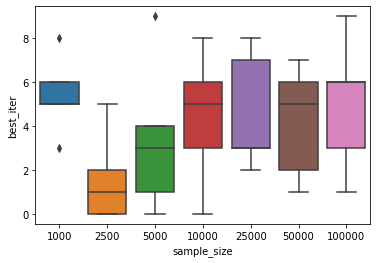

In [4]:
ax = sns.boxplot(x=df['sample_size'], y=df['best_iter'])

In [5]:
df3 = df[['sample_size', 'saved_model_score', 'avg']].melt('sample_size', var_name='cols',  value_name='vals')
df3

,sample_size,cols,vals
0,1000,saved_model_score,19.262192
1,2500,saved_model_score,19.918623
2,5000,saved_model_score,20.029111
3,10000,saved_model_score,20.099191
4,25000,saved_model_score,20.189954
...,...,...,...
65,5000,avg,19.927565
66,10000,avg,20.071490
67,25000,avg,20.129819
68,50000,avg,20.064931


In [35]:
def custom_round(x):
    base = 10
    return int(base * round(float(x)/base))

df4 = df[['time', 'saved_model_score', 'avg']].melt('time', var_name='cols',  value_name='vals')
df4["time"] = df4["time"].apply(lambda x: custom_round(x))
df4

,time,cols,vals
0,50,saved_model_score,19.262192
1,50,saved_model_score,19.918623
2,60,saved_model_score,20.029111
3,80,saved_model_score,20.099191
4,150,saved_model_score,20.189954
...,...,...,...
65,70,avg,19.927565
66,110,avg,20.071490
67,200,avg,20.129819
68,360,avg,20.064931


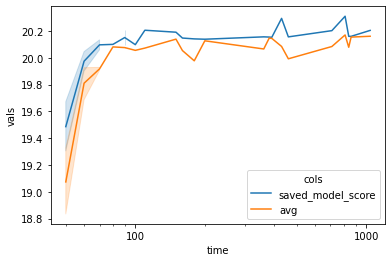

In [36]:
ax = sns.lineplot(x=df4["time"], y=df4["vals"], hue=df4['cols'])
ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

In [11]:
df_max = df.loc[df.groupby("sample_size")["saved_model_score"].idxmax()]
df_max.to_csv("best_run.csv")
df_max

,id,sample_size,saved_model_score,best_iter,time,avg
25,26,1000,19.389356,5,52.123442,18.800727
10,11,2500,19.974674,2,55.687088,19.756214
11,12,5000,20.132861,9,66.239666,19.905464
20,21,10000,20.205731,6,93.495051,20.076592
5,6,25000,20.189954,3,154.685083,20.138215
14,15,50000,20.292927,1,428.926142,20.083796
15,16,100000,20.308918,6,812.588070,20.169435


In [12]:
df_min = df.loc[df.groupby("sample_size")["saved_model_score"].idxmin()]
df_min.to_csv("worst_run.csv")
df_min

,id,sample_size,saved_model_score,best_iter,time,avg
1,2,1000,19.262192,6,48.832028,18.899033
18,19,2500,19.847058,1,56.059427,19.643861
27,28,5000,20.021283,0,63.966998,19.963762
28,29,10000,20.094664,8,93.549566,20.073881
29,30,25000,20.137385,2,197.525028,20.121860
6,7,50000,20.151857,2,387.421325,20.143887
31,32,100000,20.158995,6,839.958144,20.077754
